<a href="https://colab.research.google.com/github/yingjunjie95/loanPrediction/blob/main/Data_visualization_predicting_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


In [5]:
! pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 7.4 MB/s eta 0:00:00


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
# Load the datasets
train_df = pd.read_csv('gdrive/My Drive/playground-series-s4e10/train.csv')
test_df = pd.read_csv('gdrive/My Drive/playground-series-s4e10/test.csv')

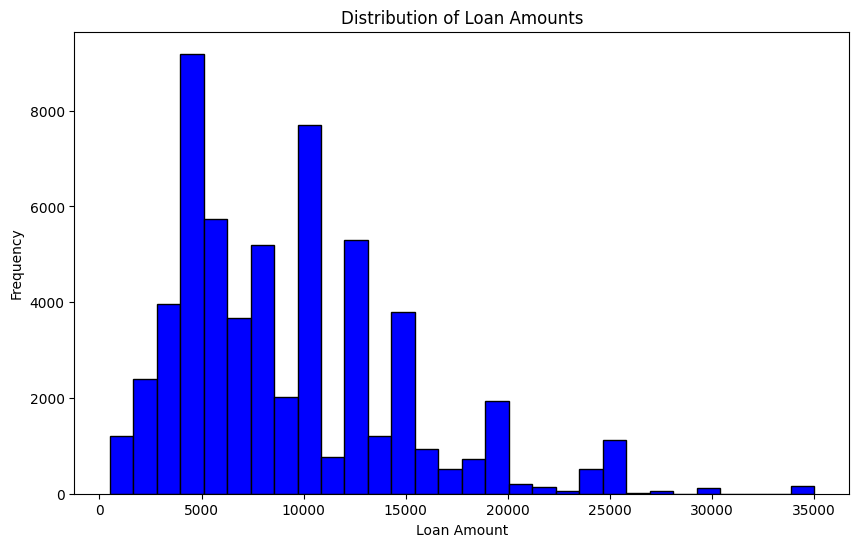

In [9]:
# Data Visualization

# Distribution of Loan Amounts
plt.figure(figsize=(10, 6))
plt.hist(train_df['loan_amnt'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

<ipython-input-10-7d24edcadd88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=train_df, palette='viridis')


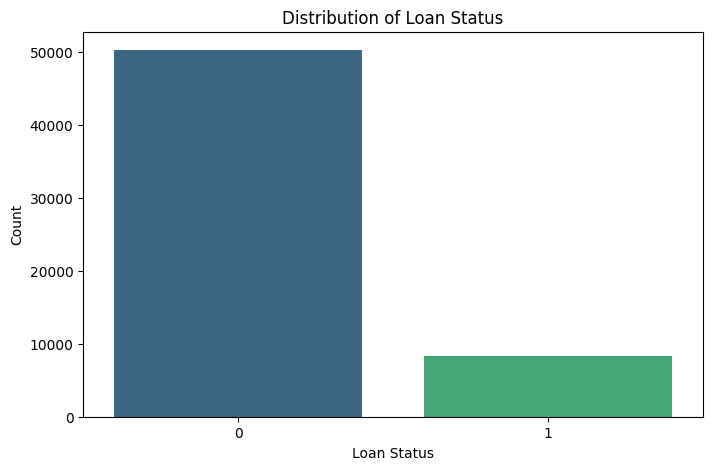

In [10]:
# Loan Status Count
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=train_df, palette='viridis')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

In [11]:
# Ensure all categorical features are encoded before calculating correlation matrix
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
encoded_train_df = train_df.copy()
for col in categorical_cols:
    if encoded_train_df[col].dtype == 'object':
        le = LabelEncoder()
        encoded_train_df[col] = le.fit_transform(encoded_train_df[col])

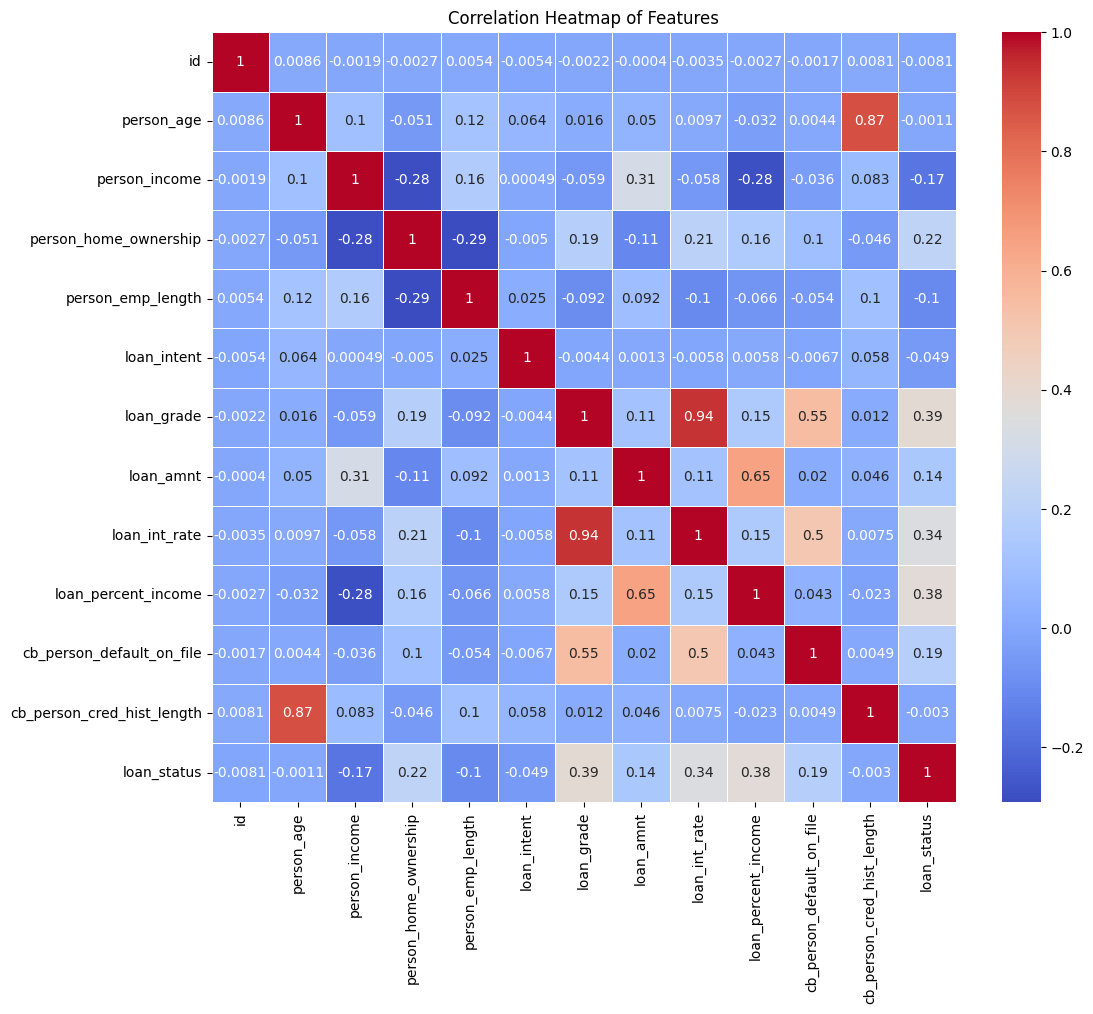

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
corr_matrix = encoded_train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [13]:
# Additional Data Visualization

# Encode categorical features before visualizations
label_encoders = {}
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le


<ipython-input-14-243b0d933329>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[feature].dropna(), label='Train', shade=True)
<ipython-input-14-243b0d933329>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_df[feature].dropna(), label='Test', shade=True)


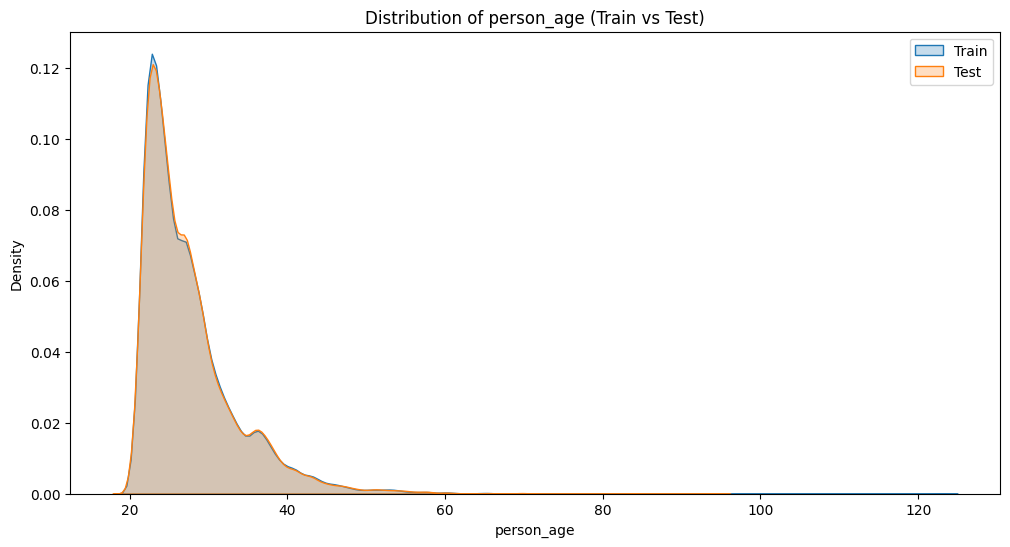

<ipython-input-14-243b0d933329>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[feature].dropna(), label='Train', shade=True)
<ipython-input-14-243b0d933329>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_df[feature].dropna(), label='Test', shade=True)


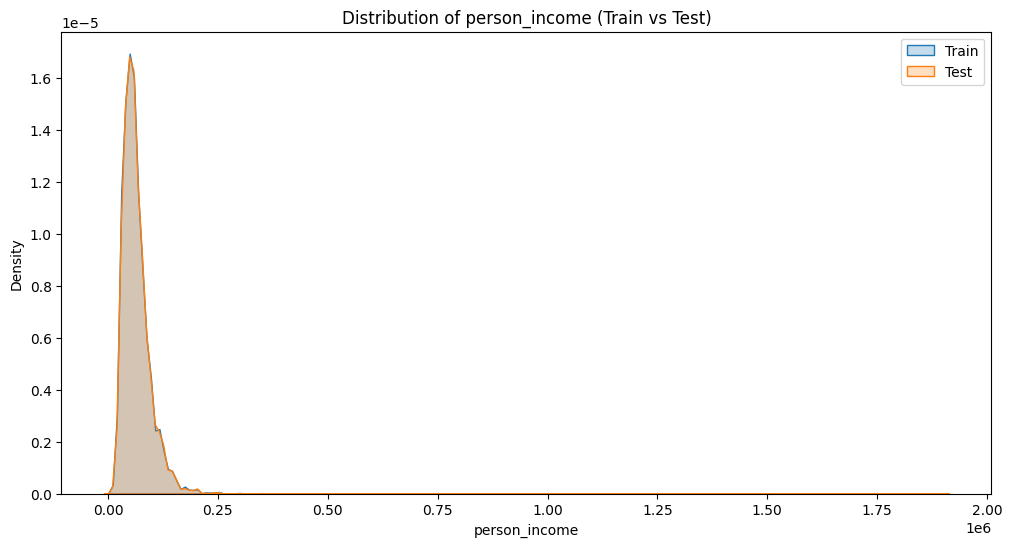

<ipython-input-14-243b0d933329>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[feature].dropna(), label='Train', shade=True)
<ipython-input-14-243b0d933329>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_df[feature].dropna(), label='Test', shade=True)


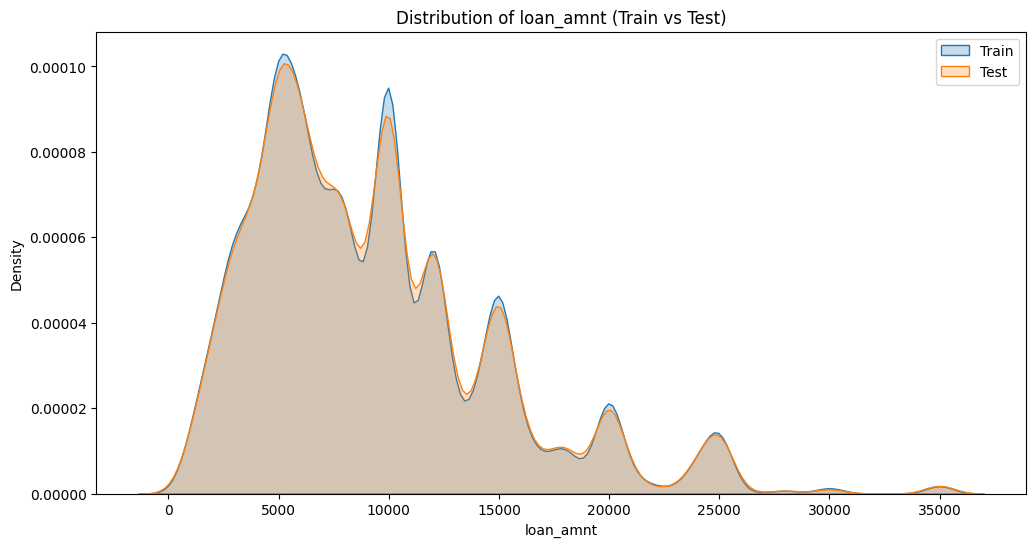

<ipython-input-14-243b0d933329>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[feature].dropna(), label='Train', shade=True)
<ipython-input-14-243b0d933329>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_df[feature].dropna(), label='Test', shade=True)


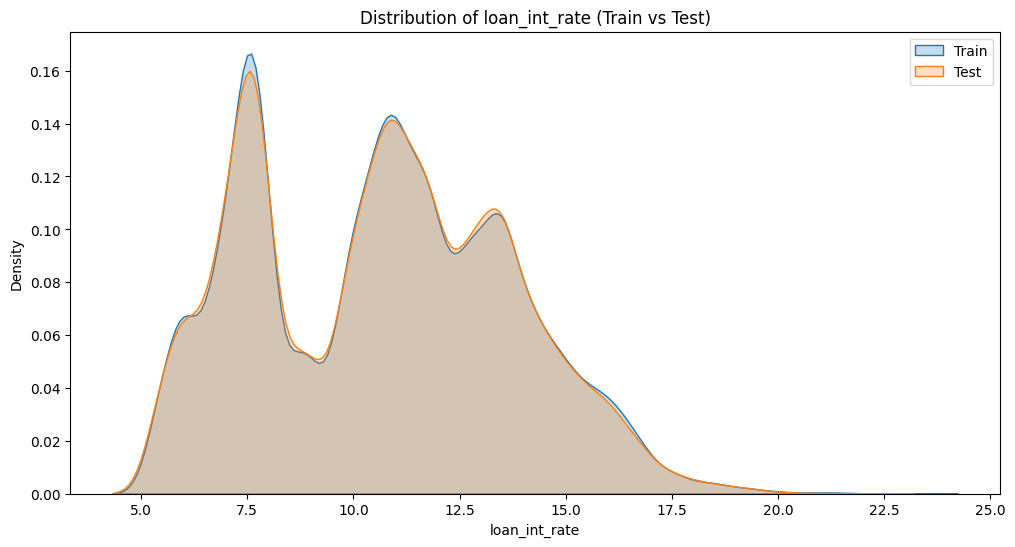

In [14]:
# Detailed Data Visualization for Train and Test Data

# Distribution of Numerical Features (Train vs Test)
numerical_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(train_df[feature].dropna(), label='Train', shade=True)
    sns.kdeplot(test_df[feature].dropna(), label='Test', shade=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature} (Train vs Test)')
    plt.legend()
    plt.show()

In [15]:
# Missing Value Analysis (Train and Test)
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()
missing_df = pd.DataFrame({'Train': train_missing, 'Test': test_missing})
missing_df = missing_df[missing_df.sum(axis=1) > 0]
if not missing_df.empty:
    plt.figure(figsize=(14, 6))
    missing_df.plot(kind='bar', figsize=(14, 6))
    plt.xlabel('Feature')
    plt.ylabel('Number of Missing Values')
    plt.title('Missing Value Analysis (Train vs Test)')
    plt.xticks(rotation=45)
    plt.show()

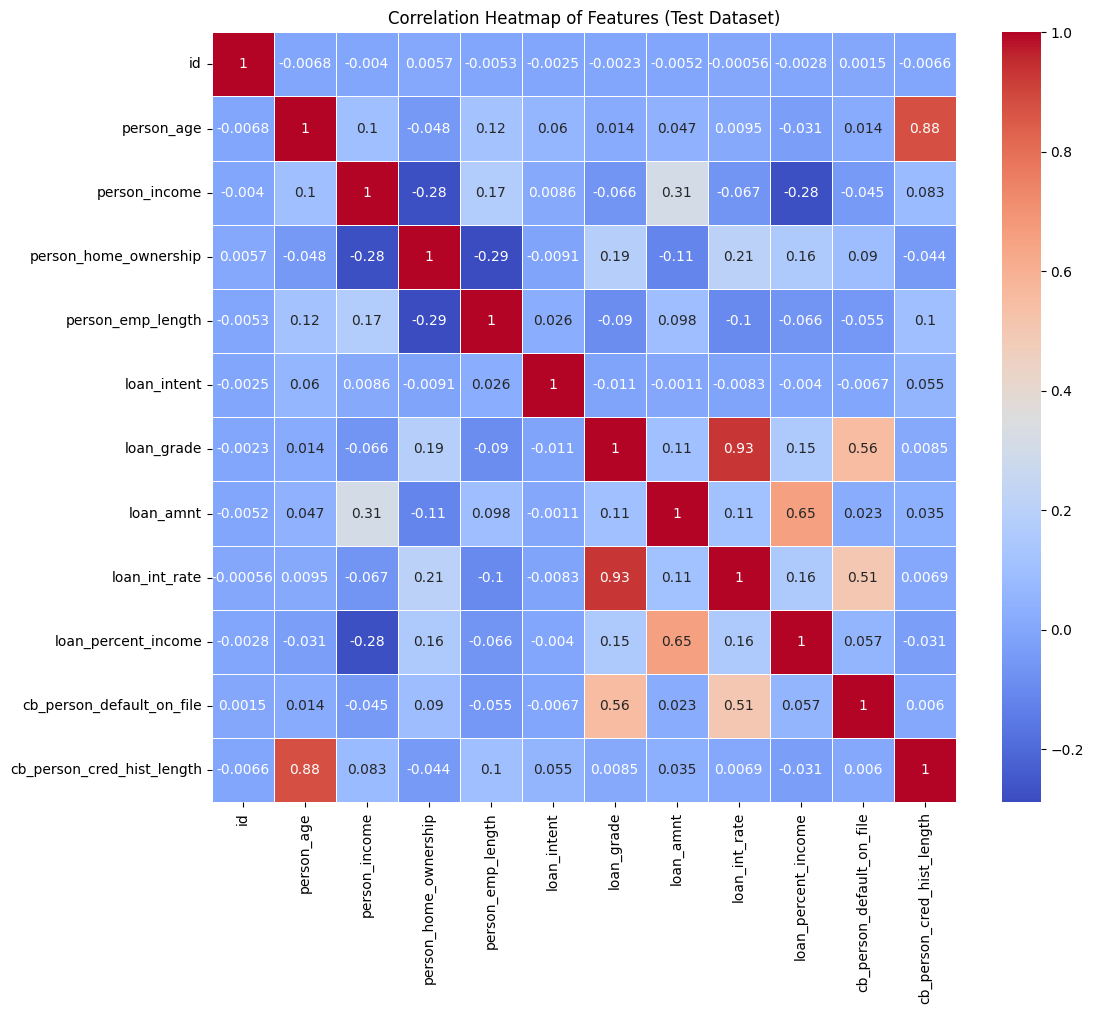

In [16]:
# Correlation Heatmap for Test Dataset
plt.figure(figsize=(12, 10))
corr_matrix_test = test_df.corr()
sns.heatmap(corr_matrix_test, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features (Test Dataset)')
plt.show()

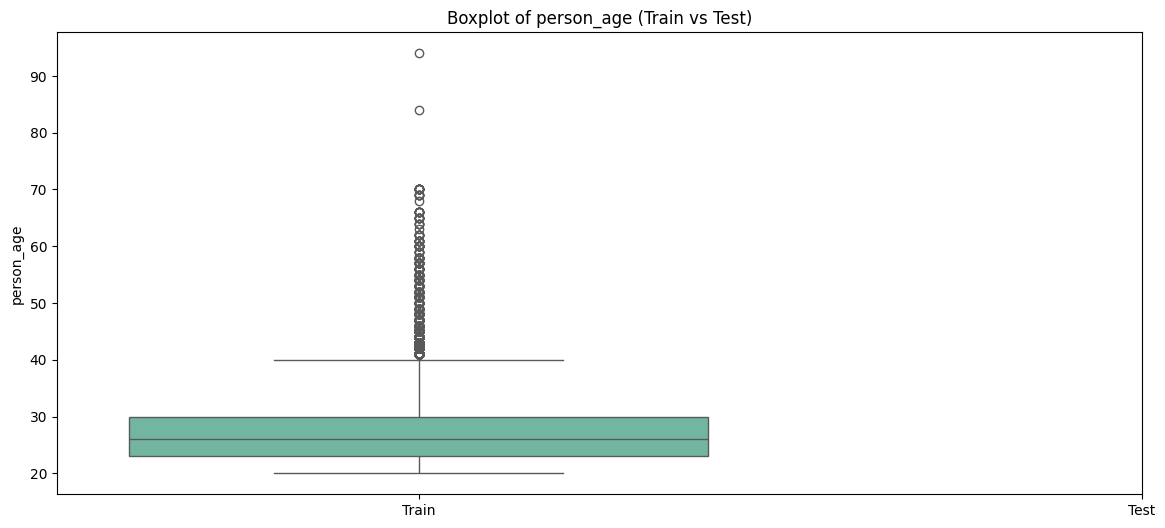

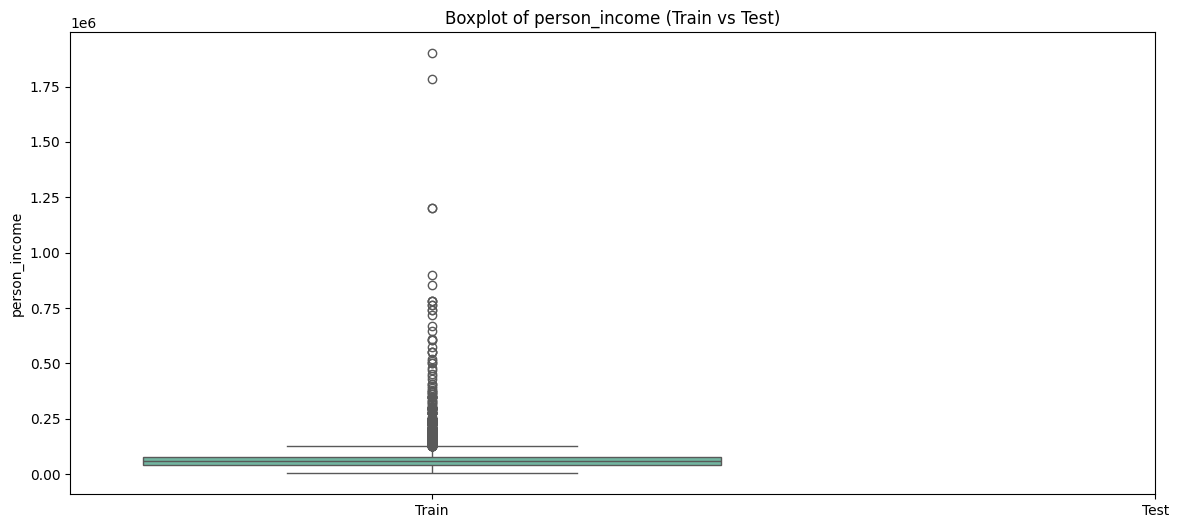

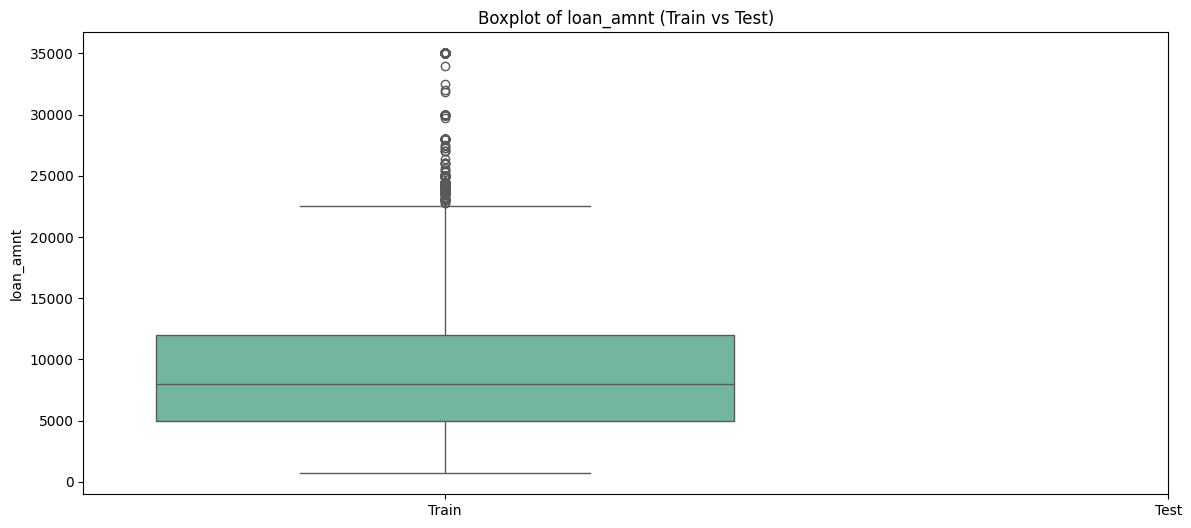

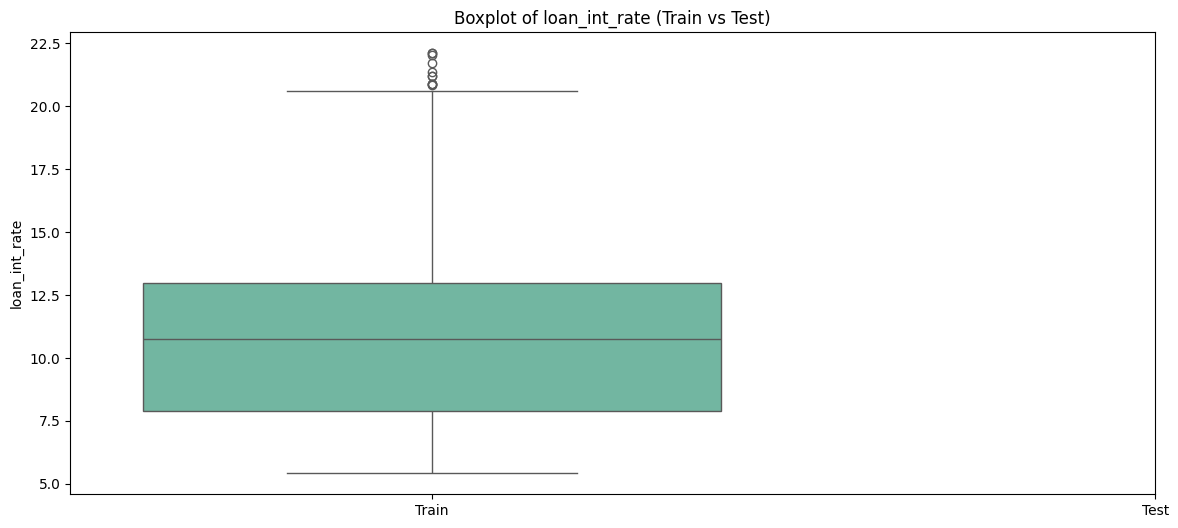

In [17]:
# Boxplots for Numerical Features (Train vs Test)
for feature in numerical_features:
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=[train_df[feature].dropna(), test_df[feature].dropna()], palette='Set2')
    plt.xticks([0, 1], ['Train', 'Test'])
    plt.ylabel(feature)
    plt.title(f'Boxplot of {feature} (Train vs Test)')
    plt.show()

<Figure size 1400x600 with 0 Axes>

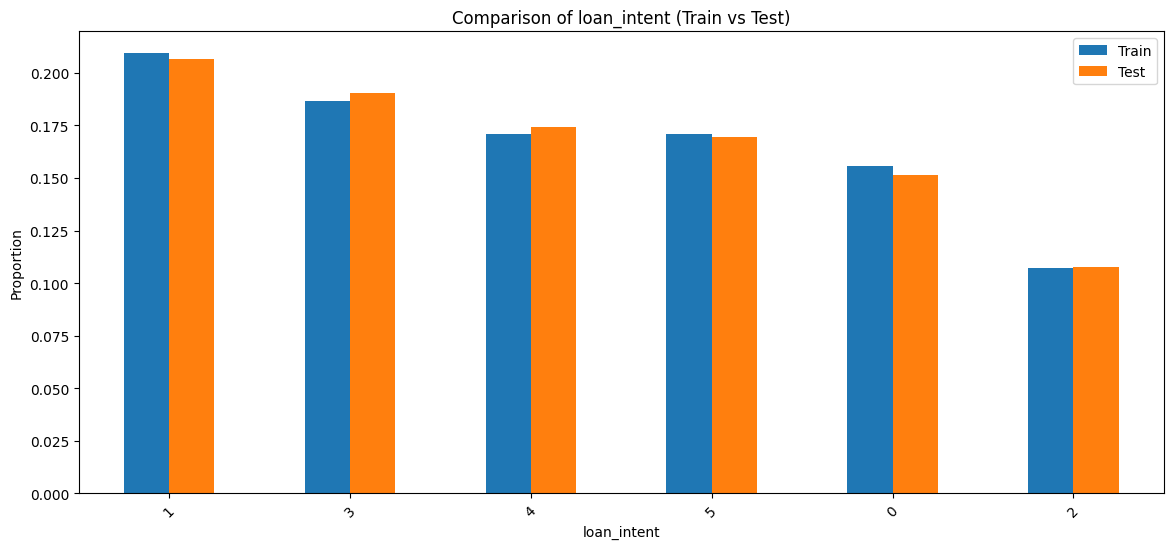

<Figure size 1400x600 with 0 Axes>

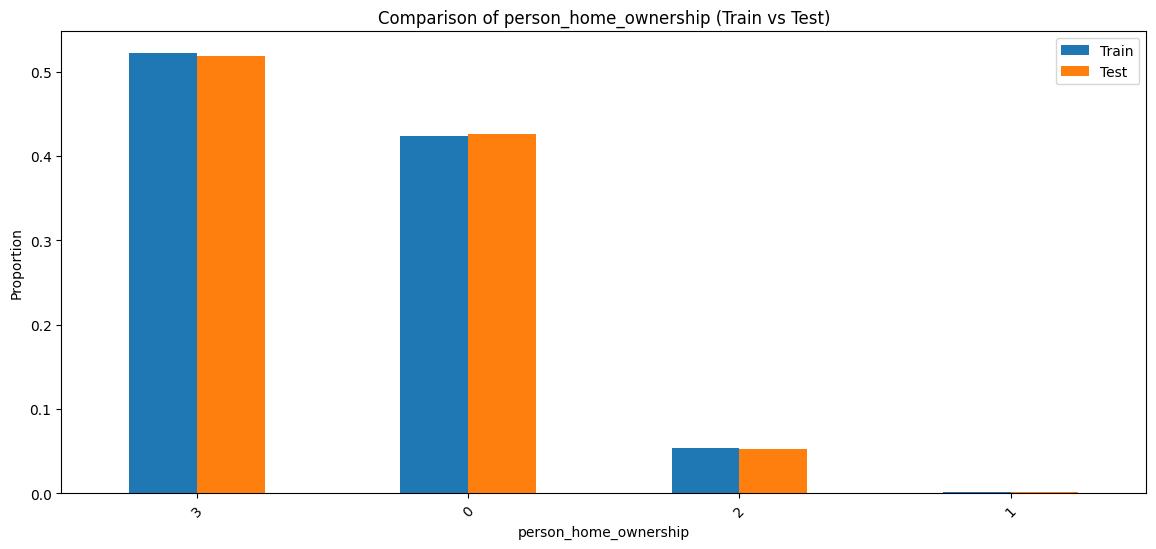

<Figure size 1400x600 with 0 Axes>

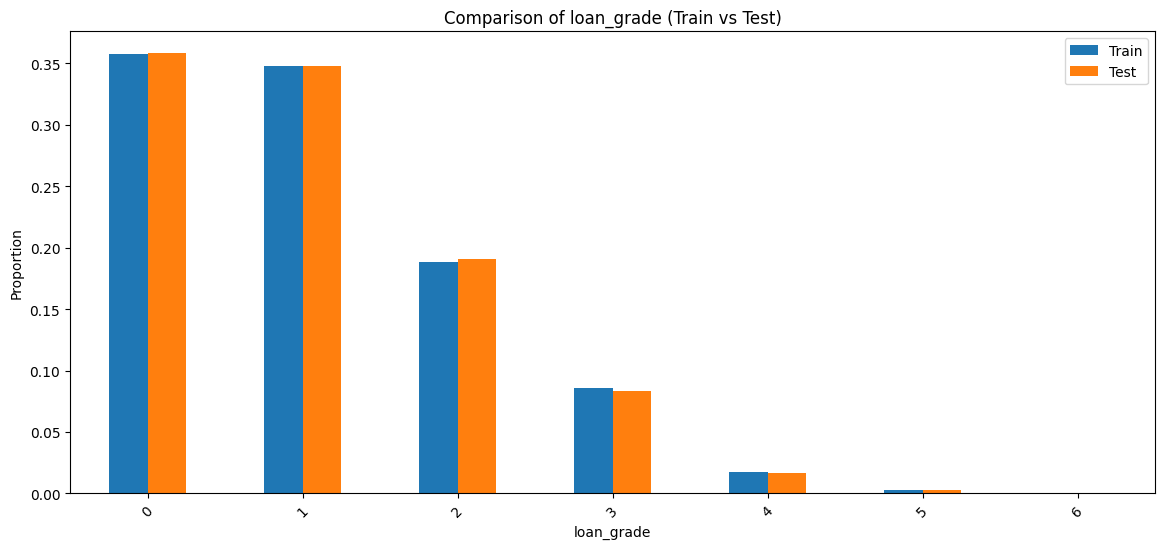

In [18]:
# Categorical Feature Comparison (Train vs Test)
categorical_features = ['loan_intent', 'person_home_ownership', 'loan_grade']
for feature in categorical_features:
    plt.figure(figsize=(14, 6))
    train_count = train_df[feature].value_counts(normalize=True)
    test_count = test_df[feature].value_counts(normalize=True)
    feature_df = pd.DataFrame({'Train': train_count, 'Test': test_count}).fillna(0)
    feature_df.plot(kind='bar', figsize=(14, 6))
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.title(f'Comparison of {feature} (Train vs Test)')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-19-057ebe90ab9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_intent', y='loan_amnt', data=train_df, palette='Set2')


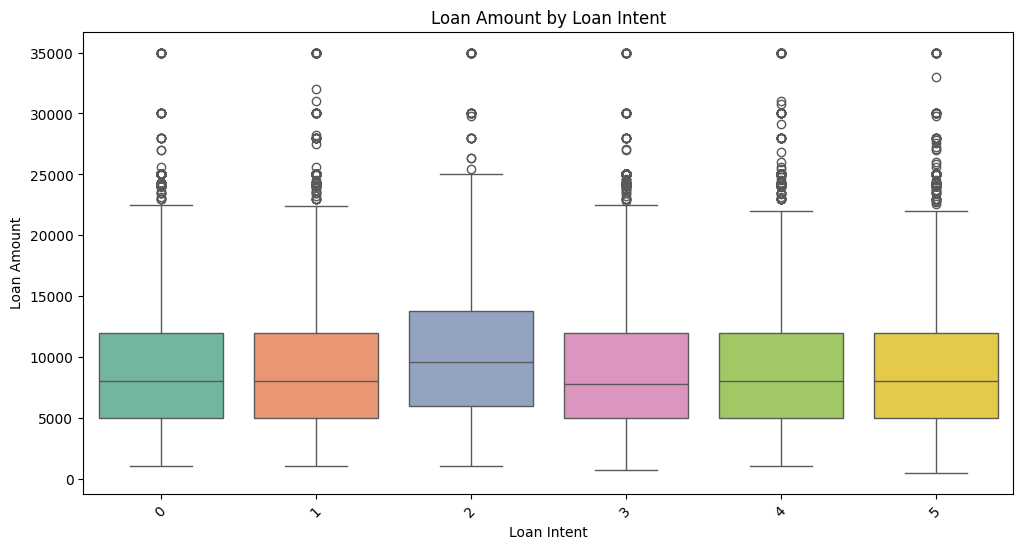

In [19]:
# Boxplot of Loan Amount by Loan Intent
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_intent', y='loan_amnt', data=train_df, palette='Set2')
plt.xlabel('Loan Intent')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Loan Intent')
plt.xticks(rotation=45)
plt.show()

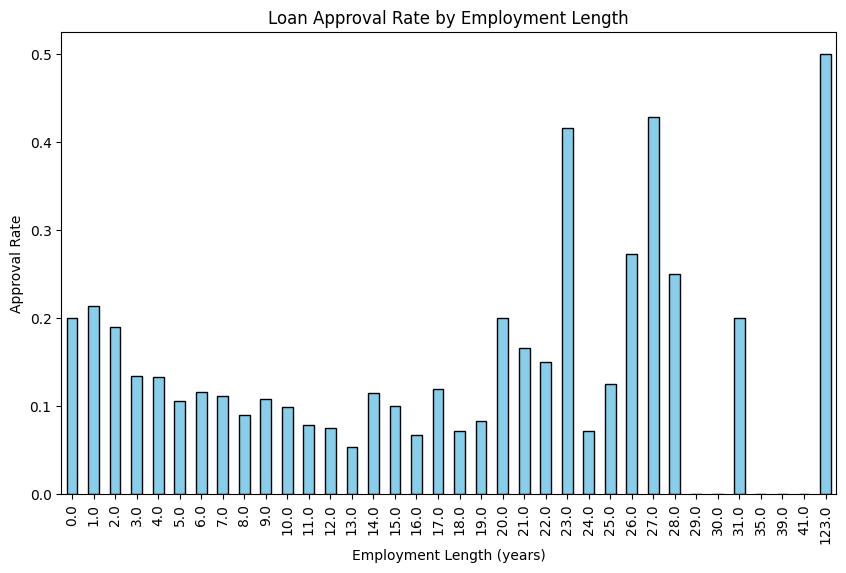

In [20]:
# Bar Chart of Employment Length vs Loan Approval Rate
plt.figure(figsize=(10, 6))
employment_approval_rate = train_df.groupby('person_emp_length')['loan_status'].mean()
employment_approval_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Employment Length (years)')
plt.ylabel('Approval Rate')
plt.title('Loan Approval Rate by Employment Length')
plt.show()

<ipython-input-21-5849d6a58fd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='person_home_ownership', y='person_income', data=train_df, palette='Set3')


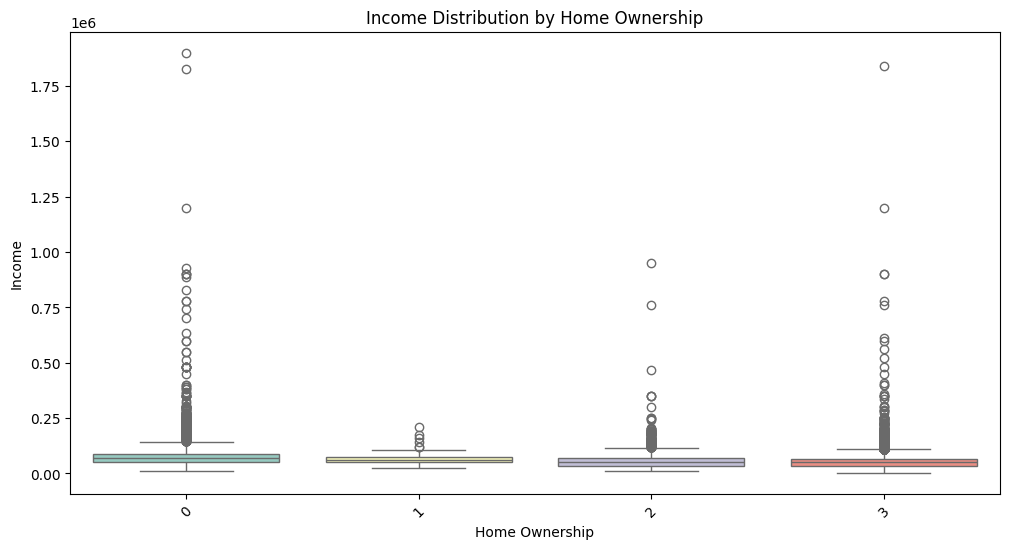

In [21]:
# Income Distribution by Home Ownership
plt.figure(figsize=(12, 6))
sns.boxplot(x='person_home_ownership', y='person_income', data=train_df, palette='Set3')
plt.xlabel('Home Ownership')
plt.ylabel('Income')
plt.title('Income Distribution by Home Ownership')
plt.xticks(rotation=45)
plt.show()

<ipython-input-22-3d1466e2e769>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_grade', y='loan_int_rate', data=train_df, palette='muted')


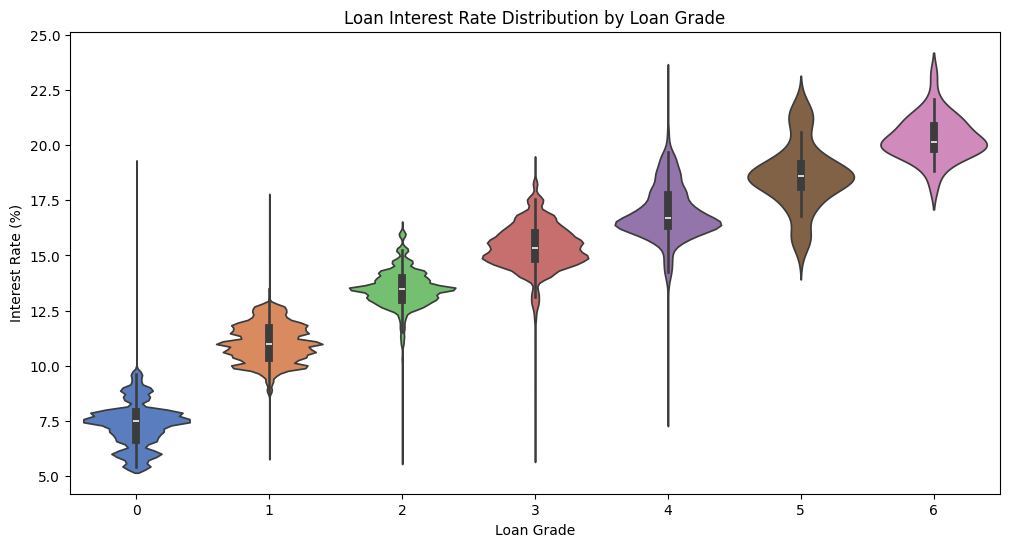

In [22]:
# Loan Interest Rate Distribution by Loan Grade
plt.figure(figsize=(12, 6))
sns.violinplot(x='loan_grade', y='loan_int_rate', data=train_df, palette='muted')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.title('Loan Interest Rate Distribution by Loan Grade')
plt.show()

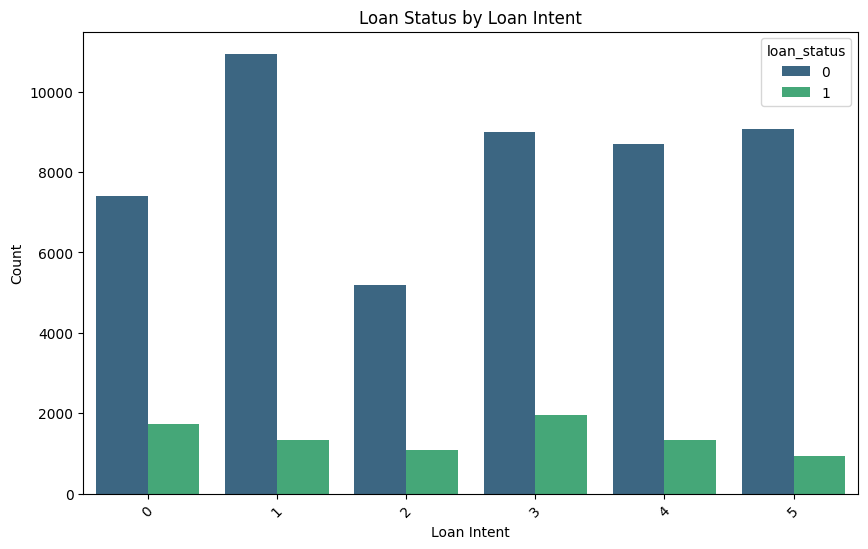

In [23]:
# Loan Status by Loan Intent
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_intent', hue='loan_status', data=train_df, palette='viridis')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.title('Loan Status by Loan Intent')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Encode categorical features
label_encoders = {}
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

In [25]:
# Split features and target
X = train_df.drop(columns=['id', 'loan_status'])
y = train_df['loan_status']


In [26]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
                  'loan_percent_income', 'cb_person_cred_hist_length']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

In [27]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Hyperparameter tuning using RandomizedSearchCV
# Define hyperparameter grids
xgb_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

catboost_param_grid = {
    'iterations': [500],
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [29]:
# RandomizedSearchCV for XGBoost
xgb_random_search = RandomizedSearchCV(XGBClassifier(eval_metric='logloss', random_state=42),
                                       param_distributions=xgb_param_grid, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)
xgboost_model = xgb_random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [30]:
# RandomizedSearchCV for LightGBM
lgbm_random_search = RandomizedSearchCV(LGBMClassifier(random_state=42),
                                        param_distributions=lgbm_param_grid, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
lgbm_random_search.fit(X_train, y_train)
lgbm_model = lgbm_random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 6708, number of negative: 40208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 883
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142979 -> initscore=-1.790765
[LightGBM] [Info] Start training from score -1.790765


In [31]:
# RandomizedSearchCV for CatBoost
catboost_random_search = RandomizedSearchCV(CatBoostClassifier(task_type='GPU', devices='0', random_state=42, verbose=0),
                                            param_distributions=catboost_param_grid, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
catboost_random_search.fit(X_train, y_train)
catboost_model = catboost_random_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [32]:
# Create a stacking ensemble
estimators = [
    ('xgboost', xgboost_model),
    ('lgbm', lgbm_model),
    ('catboost', catboost_model)
]

In [33]:
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)


In [34]:
# Train the stacked model
# Ensure no NaN values are present
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
stacking_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6708, number of negative: 40208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 883
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142979 -> initscore=-1.790765
[LightGBM] [Info] Start training from score -1.790765
[LightGBM] [Info] Number of positive: 5366, number of negative: 32166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 882
[LightGBM] [Info] Number of data points in the train set: 37532, number of used features: 11
[LightGBM] [Info] [bin

StackingClassifier(cv=5,
                   estimators=[('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=N...
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=150, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lgbm',
                                LGBMClassifier(random_state=42, subsample=1)),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7a3abe715300>)],
                   final_estimator=LogisticRegression())

In [35]:
# Make predictions on the validation set
y_pred = stacking_clf.predict(X_val)
y_pred_proba = stacking_clf.predict_proba(X_val)[:, 1]

In [36]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

In [37]:
# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.953875010657345
ROC AUC Score: 0.9590830783148847


In [38]:
# Make predictions on the test set
test_predictions = stacking_clf.predict_proba(test_df.drop(columns=['id']))[:, 1]

In [39]:
# Create a submission file
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'loan_status': test_predictions
})

In [40]:
# Save the submission file
submission_df.to_csv('gdrive/My Drive/playground-series-s4e10/my_submission.csv', index=False)
print("Sample submission file created: gdrive/My Drive/playground-series-s4e10/my_submission.csv")

Sample submission file created: gdrive/My Drive/playground-series-s4e10/my_submission.csv
